

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'



## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```



**1.1 Load the file with the csv module and put it in a Python dictionary**

In [2]:
import csv
from collections import defaultdict
from pprint import pprint

In [3]:
sat_dict = defaultdict(list)
with open('./sat_scores.csv', 'r') as f:
    sat = csv.reader(f) 
    
    header = next(sat) 
    
    for line in sat:
        for i, col in enumerate(header):
            sat_dict[col].append(line[i])

In [4]:
pprint(sat_dict, compact= True, width=60)
#still need to change strings to numbers

defaultdict(<class 'list'>,
            {'Math': ['510', '513', '515', '505', '516',
                      '499', '499', '506', '500', '501',
                      '499', '510', '499', '489', '501',
                      '488', '474', '526', '499', '527',
                      '499', '515', '510', '517', '525',
                      '515', '542', '439', '539', '512',
                      '542', '553', '542', '589', '550',
                      '545', '572', '589', '580', '554',
                      '568', '561', '577', '562', '596',
                      '550', '570', '603', '582', '599',
                      '551', '514'],
             'Rate': ['82', '81', '79', '77', '72', '71',
                      '71', '69', '69', '68', '67', '65',
                      '65', '63', '60', '57', '56', '55',
                      '54', '53', '53', '52', '51', '51',
                      '34', '33', '31', '26', '23', '18',
                      '17', '13', '13', '12', '12', '11',
                 

In [5]:
type(sat_dict)

collections.defaultdict

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?


    
**1.2 Make a pandas DataFrame object with the SAT dictionary**

- Once the object is converted to a dataframe, we still need to convert the data type to numerica values
- This is done using pd.to_numeric method, which converts the object data types to integers
- This can be confirmed by view the data types with the .dytpes attribute

In [6]:
sat = pd.DataFrame(sat_dict)
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
sat.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [8]:
cols = ['Rate', 'Verbal', 'Math']
sat[cols] = sat[cols].apply(pd.to_numeric, errors='coerce', axis=1) #convert data types to numeric

In [9]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object



**1.2 Make a pandas DataFrame object with the pandas .read_csv() function**

- pd.read_csv is used to convert the csv file directly into a dataframe
- the numeric values are automatically converted using this method

**What is the difference between loading from file and inputting this dictionary (if any)?**

- Loading directly from the file requires less steps
- Therefore inputting into a dictionary and then reading the file has more room for error
- pd.read_csv appears to automatically convert valid strings into numeric values

In [10]:
satcsv = pd.read_csv('./sat_scores.csv')
satcsv.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [11]:
satcsv.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.


    
**Look at the first ten rows of the DataFrame: what does our data describe?**

- The data appears to be observations state's scores on exams based on Rate, Verbal and Math
- State is a catorgorical value
- Rate, Verbal and Math are numerical values
- There are 4 columns and 52 rows

In [12]:
satcsv.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [13]:
satcsv.shape

(52, 4)

In [14]:
satcsv.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object



## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.



**2. Create a "data dictionary" based on the data**

Data Dictionary 
                
                : {
                    State: State is the location of the pupils
                    Math: Math score is the average math score for students in the state
                    Verbal: Verbal score is the average verbal score for students in the state
                    Rate: Rate score is average rate score for students in the state 
                    }
    Shape: (52, 4)
    dtypes:
   
        State     object
        Rate       int64
        Verbal     int64
        Math       int64
        dtype:    object



## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)



**3.1 Using seaborn's distplot, plot the distributions for each of Rate, Math, and Verbal**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

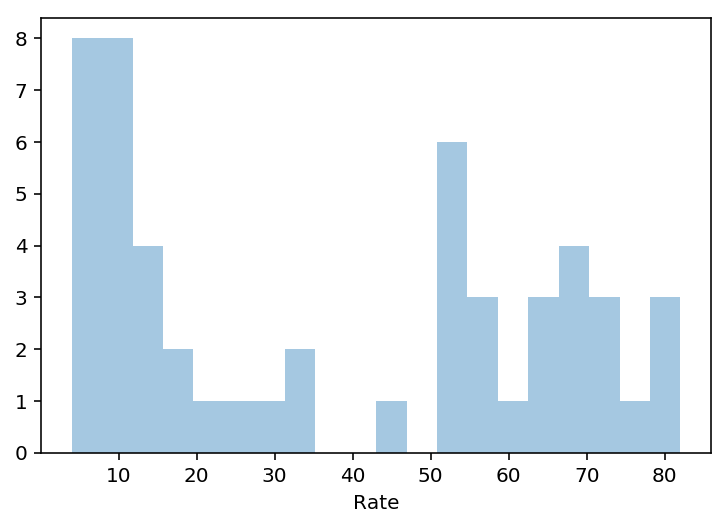

In [16]:
sns.distplot(satcsv.Rate, kde=False, bins=20)
plt.show()

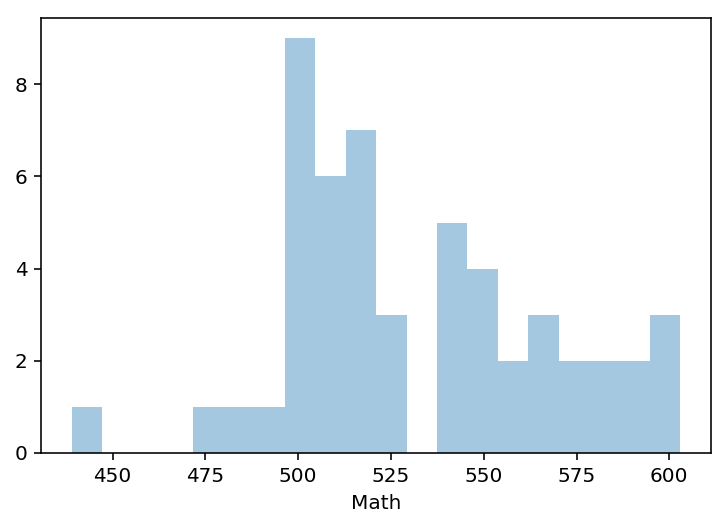

In [17]:
sns.distplot(satcsv.Math, kde=False, bins=20)
plt.show()

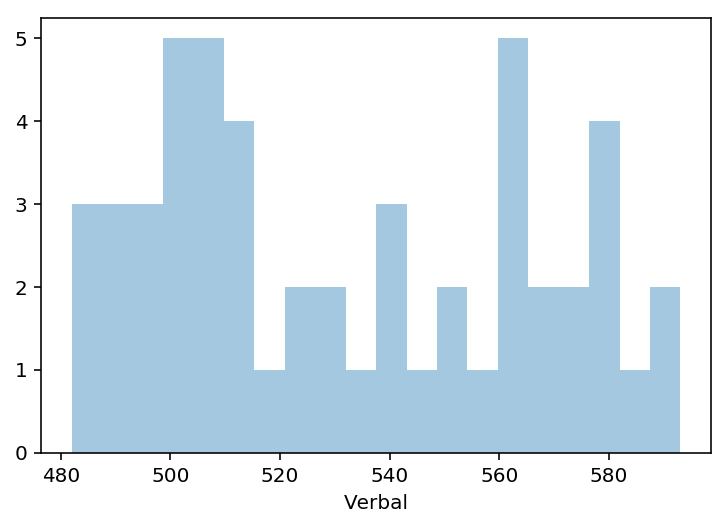

In [18]:
sns.distplot(satcsv.Verbal, kde=False, bins=20)
plt.show()

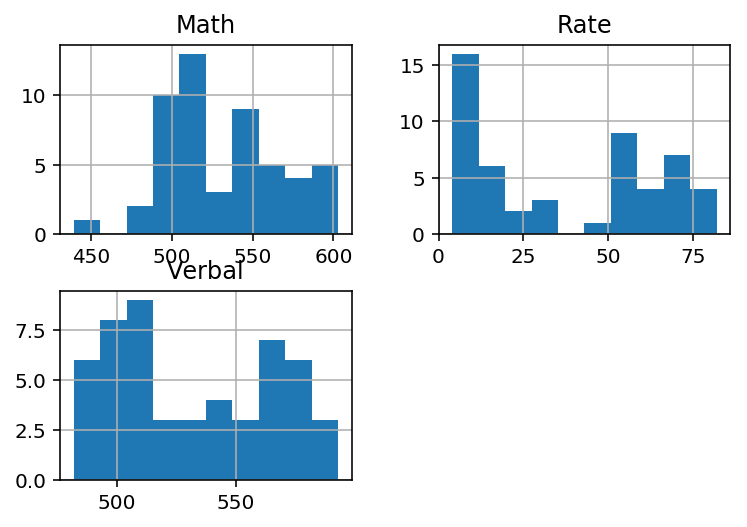

In [19]:
satcsv.hist()
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)



**3.2 Using seaborn's pairplot, show the joint distributions for each of Rate, Math, and Verbal**

- Looking at the pairplot we can see the relationships bewteen the variables - Rate, Math and Verbal
- kind= 'reg' fits a linear regression line which make the relationship easier to see
- Initially, it looks like Verbal and Math are strongly postively correlated
- There appears to be a negative correlation between Math and Rate
- The also appears to be a negative correlation between Verbal and Rate

[]

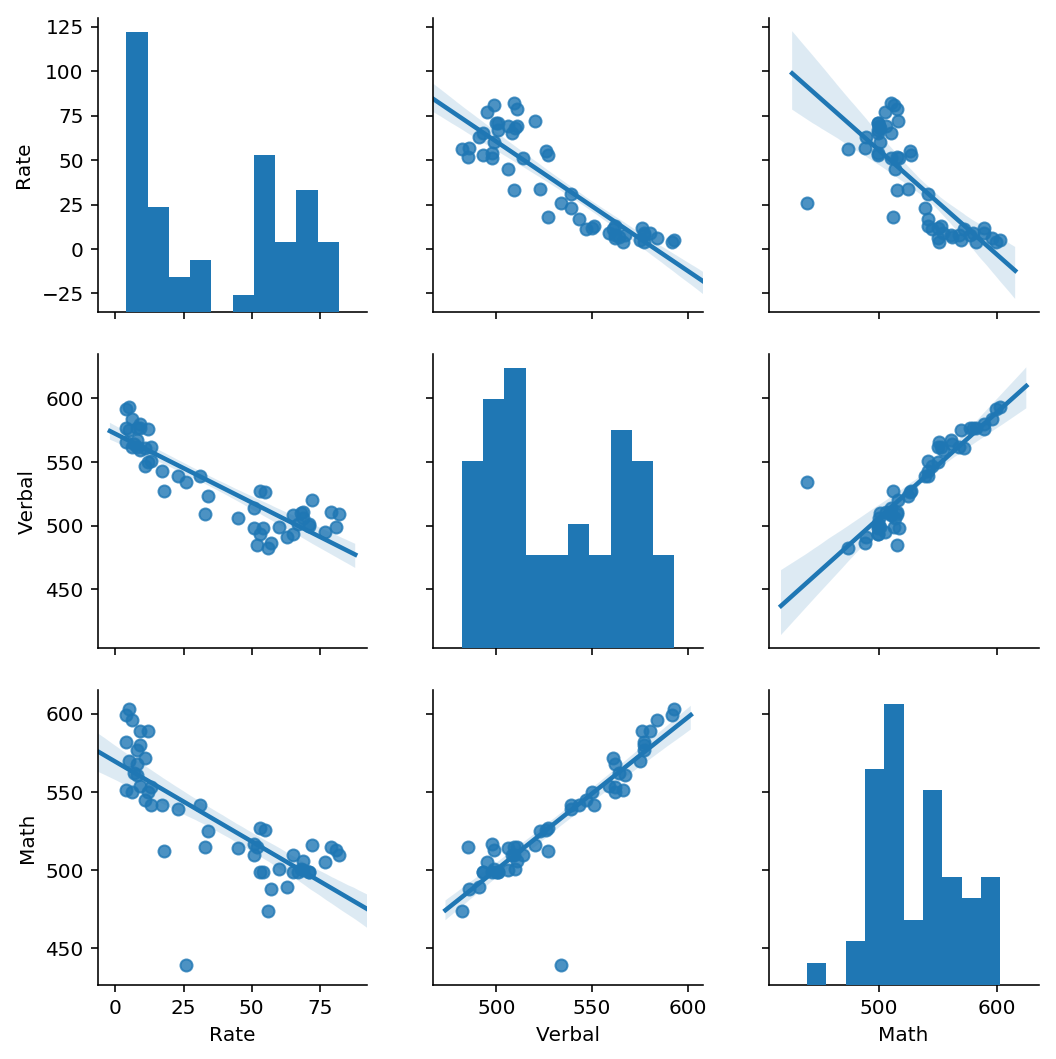

In [20]:
sns.pairplot(satcsv, kind='reg')
plt.plot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas



**4.1 Plot a stacked histogram with Verbal and Math using pandas**

- To do this, the a new dataframe was made which only included the Math and Verbal scores
- type(df) confirmed that a data frame object had been created

In [21]:
math = satcsv['Math'].values
verbal = satcsv['Verbal'].values
math

array([510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499,
       489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515,
       542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580,
       554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514])

In [22]:
df = pd.DataFrame ({
    'Math': math,
    'Verbal': verbal
})

In [23]:
type(df)

pandas.core.frame.DataFrame



- The first histogram created used 'stacked' = True to overlay the 2 variables, this looked quite untidy though
- The second version of the histogram was plotted using sns, the histograms are see through for better clarity, the y axis is also based on the probabilty density function
- The third version is a 2d histogram to show bivariate probability ditribution estimated using hexagons

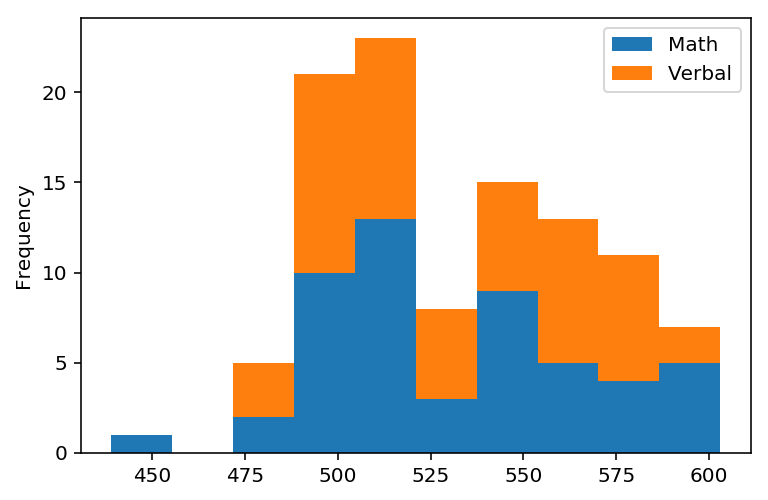

In [24]:
df.plot(kind='hist', stacked=True)
plt.show()

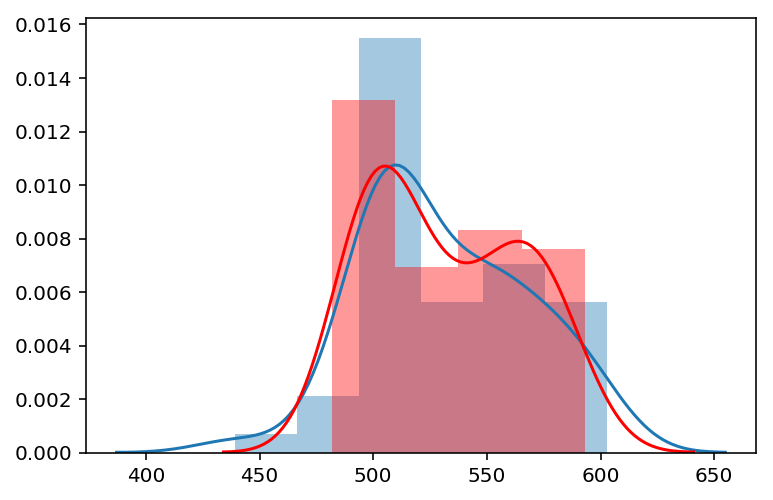

In [25]:
(fig, ax) = plt.subplots()
sns.distplot(math, ax=ax)
sns.distplot(verbal, ax=ax, color='red')
plt.show()

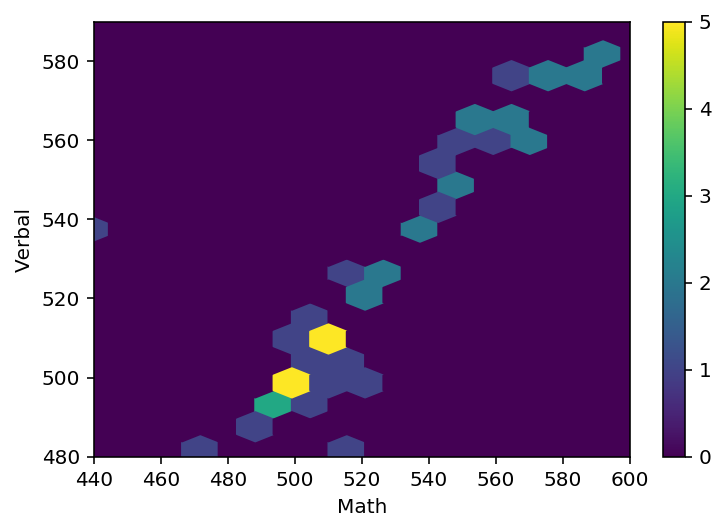

In [26]:
plt.hexbin(math, verbal, gridsize= (15,10))
plt.colorbar()
plt.xlabel('Math')
plt.ylabel('Verbal')
plt.axis((440, 600, 480, 590))
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?


    
**4.2 Plot Verbal and Math on the same chart using boxplots**

**What are the benefits of using a boxplot as compared to a scatterplot or a histogram?**

- Boxplots allows you to view the distribution of the data set, with the IQR marked to see where the majority of the data lie
- Boxplots also show the range of the data
- You are also able to see outliers/ oddities about the data which are outside of the 'whiskers' 
- Boxplots make it visually easy to compare the two data set's distributions next to each other.

- Histgrams are better for looking at one variable at a time - it is difficult to see outliers on a histogram
- Scatterplot is good for looking at the realtionship 2 variables rather than looking directly at their distributions

**What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?**

- Initially we can see that the Rate scores are much lower numbers than the scores for Math and Verbal 
- Therefore it would not be worthwhile doing a comparison as the boxplot's y axis would have no overlap between the Rate obervations and the Verbal and Math observations
- The data would need to be normalised first and then compared in a box plot

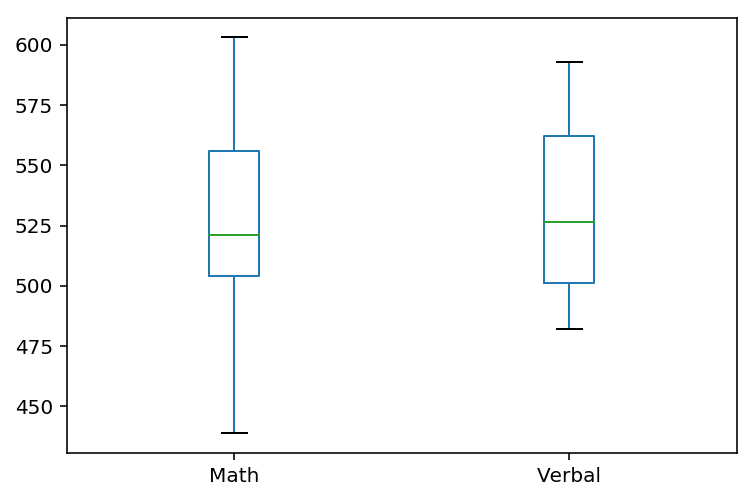

In [27]:
df.plot(kind='box')
plt.show()



### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 



    
**4.3 Plot Verbal, Math, and Rate appropriately on the same boxplot chart**

- First a new dataframe is made with the 3 columns we are interested in
- Using a manual calculation, we make calculate the data relative their own ranges
- This is called normalising the data
- This allow us to compare data using different ranges and / or measurements
- We can then plot them on the histogram

In [28]:
df3 = satcsv.drop(['State'], axis=1)
df3.head()

,Rate,Verbal,Math
0,82,509,510
1,81,499,513
2,79,511,515
3,77,495,505
4,72,520,516


In [29]:
normed_df3 = (df3 - df3.min()) / (df3.max() - df3.min())

In [30]:
normed_df3.head()

,Rate,Verbal,Math
0,1.000000,0.243243,0.432927
1,0.987179,0.153153,0.451220
2,0.961538,0.261261,0.463415
3,0.935897,0.117117,0.402439
4,0.871795,0.342342,0.469512


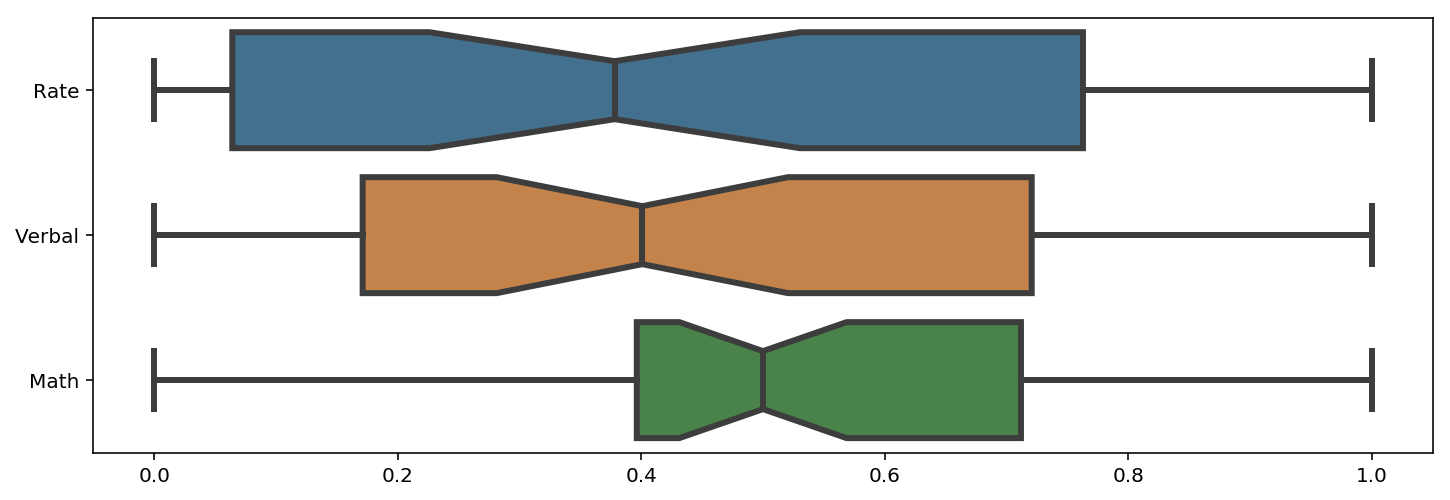

In [31]:
ig = plt.figure(figsize=(12, 4))
ax = ig.gca()
ax = sns.boxplot(data=normed_df3, orient='h', fliersize=5,
                linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()


- On the boxplot above of the normalised data we can see the distributions of all 3 variables
- The x axis is 'normalised' as it represents the distribution 0 to 1
- Rate has the largested range relative to itself



## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?






**5.1 Find the list of states that have Verbal scores greater than the average of Verbal scores across states**

- Using the .mean() method we are able to find the mean for the Verbal Scores
- Using .loc allows us to filter the Verbal data so that only the values above the mean are in the new list

In [32]:
satcsv.Verbal.mean()

532.0192307692307

In [33]:
len(satcsv.Verbal)

52

In [34]:
abovemean = satcsv.loc[satcsv['Verbal'] > satcsv.Verbal.mean()]
abovemean.head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


In [35]:
len(abovemean)

24



**How many states are above the mean?**

- There are 24 states above the mean out of a total of 52

**What does this tell you about the distribution of Verbal scores?**

- If the verbal scores were perfectly normal distributed, we would expect that there would be 26 states on either side of the mean (52/2).
- As there are only 24 states above the mean this indicates that the distribution is positively skewed. 
- This could be because generally more states got lower scores or because there were some outliers which had high verbal scores.
- On further analysis (below) looking at the min and max scores for extreme values, and also looking at the median. -- It appears that there are not extreme outliers (min = 482, max = 593). The median is 526.5 compared to the mean which is 532. 
- This indicates that there there is a genuine positve distribution

In [36]:
satcsv.Verbal.min()

482

In [37]:
satcsv.Verbal.max()

593

In [38]:
satcsv.Verbal.median()

526.5

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?



**5.2 Find the list of states that have Verbal scores greater than the median of Verbal scores across states**

- There are 26 states which have a score higher than the median

**How does this compare to the list of states greater than the mean of Verbal scores? Why?**

- There are more on the above median list than the above mean list because the distribution of Verbal scores is posisitvely skewed.
- The median indicates the 50% percentile of distribution so it is expected that it would lie in the middle of the states, whereas the mean can be influenced by data points with extreme values
- Although there does not appear to be outliers, there may be quite a few data points which are high which will make the mean a higher value


In [39]:
satcsv.Verbal.median()

526.5

In [40]:
len(satcsv.loc[satcsv['Verbal'] > satcsv.Verbal.median()])

26

In [41]:
abovemedian = satcsv.loc[satcsv['Verbal'] > satcsv.Verbal.median()]
abovemedian.head()

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.




**5.3 Create a column that is the difference between the Verbal and Math scores**

In [42]:
satcsv['Verbal - Math'] = satcsv.Verbal - satcsv.Math

In [43]:
satcsv.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.



**5.4 Create two new DataFrames showing states with the greatest difference between scores**
- First a new dataframe is created which just includes the State and Verbal - Math columns

In [44]:
satcsv2 = satcsv.drop(['Rate', 'Verbal', 'Math'], axis = 1) 
satcsv2.head()

,State,Verbal - Math
0,CT,-1
1,NJ,-14
2,MA,-4
3,NY,-10
4,NH,4




**Your first DataFrame should be the 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math.**

**It should be sorted appropriately to show the ranking of states**


In [45]:
verbalgreater = satcsv2.sort_values('Verbal - Math', ascending= False).head(10)
verbalgreater.index = [1,2,3,4,5,6,7,8,9,10]
verbalgreater

,State,Verbal - Math
1,OH,95
2,MS,15
3,WV,15
4,AR,12
5,NM,9
6,TN,9
7,VA,9
8,DC,8
9,ME,6
10,OK,6



    
**Your second DataFrame will be the inverse: states with the greatest gap between Verbal and Math such that Math is greater than Verbal.**
**Again, this should be sorted appropriately to show rank.**

In [46]:
mathgreater = satcsv2.sort_values('Verbal - Math', ascending= True).head(10)
mathgreater.index = [1,2,3,4,5,6,7,8,9,10]
mathgreater

,State,Verbal - Math
1,HI,-30
2,CA,-19
3,NJ,-14
4,IL,-13
5,WI,-12
6,MI,-11
7,NY,-10
8,IA,-10
9,MN,-9
10,All,-8




**Print the header of both variables, only showing the top 3 states in each**

In [47]:
verbalgreater.head(3)

,State,Verbal - Math
1,OH,95
2,MS,15
3,WV,15


In [48]:
mathgreater.head(3)

,State,Verbal - Math
1,HI,-30
2,CA,-19
3,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!


### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?




**6.1 Create the correlation matrix of your variables (excluding State)**


**What does the correlation matrix tell you?**

- There is a strong postive correlation between Math and Verbal scores (0.9)
- Verbal and Rate have strong negative correlation (-0.89)
- Math and Rate have strong negative correlation (-0.77)
- It is not worth looking at the Verbal - Math correlation as the values in this set are derived from Math ans Verbal

In [49]:
satcsv.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000




### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.


    
**6.2 Use pandas' .describe() built-in function on your DataFrame**

**Write up what each of the rows returned by the function indicate.**

- count: the count or number of oberservations - all have 52 rows
- mean: the average of the data points in the column
- std: the standard deviation of the column
- min: the minimum value 
- 25%: the 1st quartile of the data, the mark where 25% of the data lies
- 50%: the median/ 2nd quartile, the mark where 50% of the data lies
- 75%: the 3rd quartile, the mark where 25% of the data lies
- max: the maximum value

In [50]:
satcsv.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000




### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?



**6.3 Assign and print the covariance matrix for the dataset**

**Describe how the covariance matrix is different from the correlation matrix.**

- The covariance is the correlation before it has been standardised
- The covariance can be any number
- The correlation is a standardised form of covariance where all values are between -1 and 1
- 1 is strong positive correlation -1 is strong negative correlation 0 is no correlatiion

**Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?**

- Due to the correlation being fixed between -1 and 1 values it is easier to intepret the correlation matrix
- The correlation allows us interpret values which have a relationship but use different measurements (so are less clear until standardised)

In [51]:
satcsv.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995




## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?



**7.1 Load the data using pandas**

- Use - Percentage of those in an age group who used alcohol in the past 12 months
- Frequency - Median number of times a user in an age group used alcohol in the past 12 months

In [52]:
eda = pd.read_csv('./drug-use-by-age.csv')
eda.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [53]:
eda.tail(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0




**Does this data require cleaning?**

- Yes, there are many numeric columns which are objects. This could be because of the '-' characters.
- In the age columns, there are object values such as '30-34', when this data is converted to a numeric value it will be Nan. Therefore I have created new value for these columns based on the midpoint of the age bracket. e.g. '30 - 34' will be '32' which will stay as a numeric value after conversion.

**Are variables missing?**

- The missing data needs to be converted to NaN or replaced with suitable values

**How will this affect your approach to EDA on the data?**

- The data will have to be cleaned and missing values changed before EDA can be performed
- Otherwise the EDA will be inaccurate

In [54]:
cols = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22.5, 24.5, 27.5, 32, 42, 57, 67]
eda['age'] = cols

In [55]:
eda.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,27.5,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,32.0,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,42.0,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,57.0,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,67.0,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [56]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null float64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-


    
- The code below is to covert the object columns to numerical values (which is better for analysis)
- The eda.dtypes confirms this - no columns are 'object' data types.
- The describe method shows that there are null values but this is better to interpret than random string characters.

In [57]:
cols1 = ['age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']
eda[cols1] = eda[cols1].apply(pd.to_numeric, errors='coerce', axis=1)
eda.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13.0,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [58]:
eda.dtypes

age                        float64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object



- The function below performs a linear interpolation on the all Nan values possible to “guess” the value that is most likely to be filled in
- The larger the data set that is provided the better for this method
- Most Nan values have been replaced but not all in the data below

In [59]:
eda.interpolate() 

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13.0,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17.0,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18.0,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.00,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19.0,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.00,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20.0,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.00,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21.0,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.00,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [60]:
eda.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,27.5,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,32.0,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,42.0,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,57.0,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,67.0,2448,49.3,52.0,1.2,36.0,0.0,NaN,0.0,NaN,...,0.0,NaN,0.2,5.0,0.0,364.0,0.0,NaN,0.0,15.0


In [61]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null float64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycon

In [62]:
eda.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,25.735294,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,15.681515,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,27.500000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,67.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!



**7.2 Do a high-level, initial overview of the data**

- Looking at the explanation of the columns from the link to the github website I can see the definition of the columsn are:
    - Use - Percentage of those in an age group who used alcohol in the past 12 months
    - Frequency - Median number of times a user in an age group used alcohol in the past 12 months
- eda.columns gives a breakdown of all columns in the data set
- To refine the data and so there is no multicollinerarity I will remove the 'frequency' columns - this is done using eda.loc and making a new dataframe from the selected columns
- This removes 13 columns of the data which is easier to analyse
- I think that the 'Use' column is better to analyse as it gives an overview as a % of the whole age group
- Whereas frequency give the median times a user comsumes the drug, so it only is applicable to the people who are already using the drug

In [63]:
eda.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [64]:
eda2 = eda.loc[:,['age', 'n', 'alcohol-use',
       'marijuana-use', 'cocaine-use',
       'crack-use', 'heroin-use',
       'hallucinogen-use', 'inhalant-use',
     'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use',
       'stimulant-use', 'meth-use', 'sedative-use']]

eda2.shape

(17, 15)

In [65]:
eda.shape

(17, 28)

In [66]:
eda2

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12.0,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13.0,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14.0,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15.0,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16.0,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17.0,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18.0,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19.0,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20.0,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21.0,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3




- Looking at the correlation of the variables in a heatmap can give a visual insight into the relationships between variables
- Drop the age columns to compare the continous variables in the data

In [67]:
eda2.corr()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,1.000000,0.285487,0.358307,-0.384235,-0.192516,0.135633,-0.204338,-0.418577,-0.799251,-0.443739,-0.393117,-0.261004,-0.409751,-0.274987,-0.373414
n,0.285487,1.000000,0.310512,-0.169007,-0.021565,0.281797,0.007798,-0.295302,-0.368395,-0.083587,-0.166039,-0.071086,-0.201621,-0.063571,-0.119997
alcohol-use,0.358307,0.310512,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,-0.384235,-0.169007,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,-0.192516,-0.021565,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.135633,0.281797,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,-0.204338,0.007798,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,-0.418577,-0.295302,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.799251,-0.368395,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,-0.443739,-0.083587,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666


In [68]:
eda4 = eda2.drop(['age','n'], axis=1)

In [69]:
eda4.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


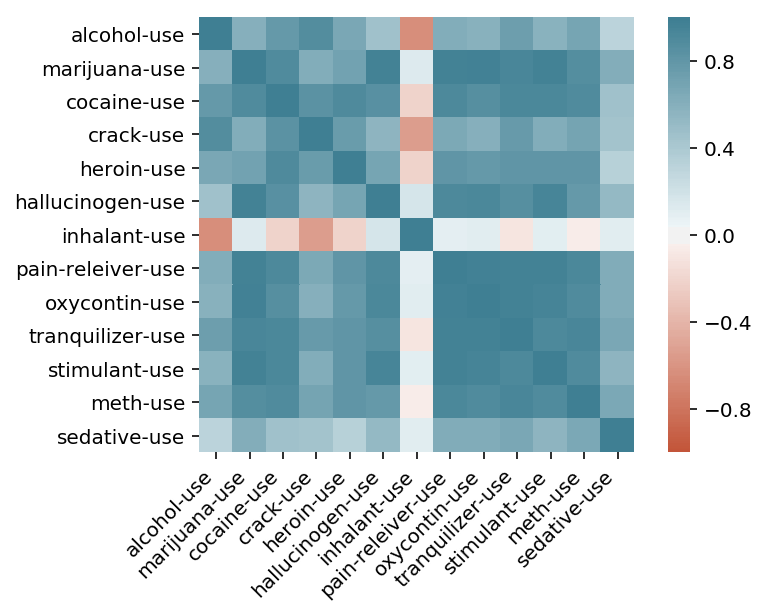

In [70]:
corr = eda4.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



- From the heatmap which show correlation between 2 variables we can see the the following variables look to have a strong positive correlation:
    - Alcohol use and crack use
    - Marijuana use and cocaine use
    - Hallucinogen use and marijuana use
    - Pain reliver use and marijuana use etc..
    
- There appears to be little to no correlation between these variables:
    - Alcohol use and sedative use
    - Marijuana use and inhalent use

- The appears to be strong negative correlation between these variable:
    - Inhalent use and alcohol use
    - Crack use and inhalent use

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.


    
**Question and deliverables**



**1. Write a specific question you would like to answer with the data (that can be accomplished with EDA)**

- Is there a relationship between the use of cocaine and the use of marijuana?
- Null Hypothesis = There is not relationship between the use of cocaine and marijuana
- Alternative Hypothesis = There is a relationship between the use of cocaine and marijuana


**2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?**
 
 - After testing my hypothesis the next step would be to further investigate the relationship by asking further questions:
     - Is the relationship causation or correlation? Do people use marijuana becuase they use cocaine (and vice versa) or is it coincidental?
     - If there is a causation relationship could it indicate that marijuana is a 'gate way' drug which leads to using further more dangerous drugs?
     - Is the relationship stronger between certain age groups?
     - Given further funding the inistiute conducting the analysis could investigate to other life-style factors which may contribute to the relationship.


    
**Report**

- An initial plot of the distribtion of the variables cocaine-use and marijuana use seems to show that they have a similar distribution. However this requires further investigation.

In [71]:
eda3 = eda.loc[:, ['cocaine-use','marijuana-use']]

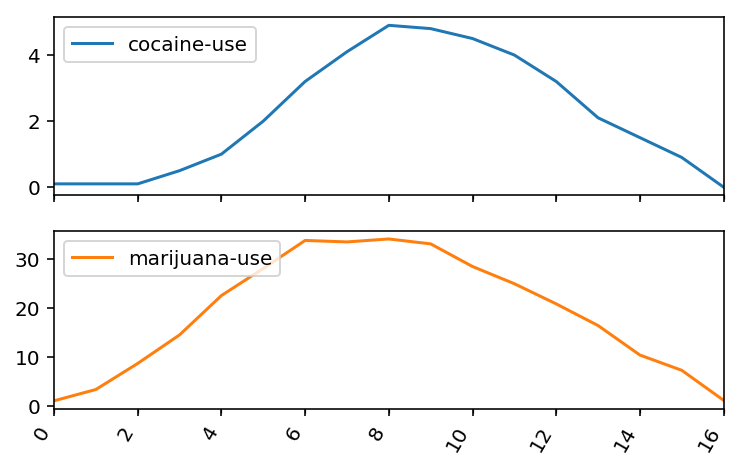

In [72]:
eda3.plot(subplots=True)
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.show()


 
 **Boxplots and Stripplots**

- The boxplots are drawn to get an idea of how the data are distributed (the boxplot box is drawn by the IQR)
- The stripplot is complimentary to the boxplot and is layed over the top to see the actual data plots
- Any outliers will be over the 'whiskers' of the box plots
- Both Cocaine-use and Marijuana-use do not appear to have any outliers

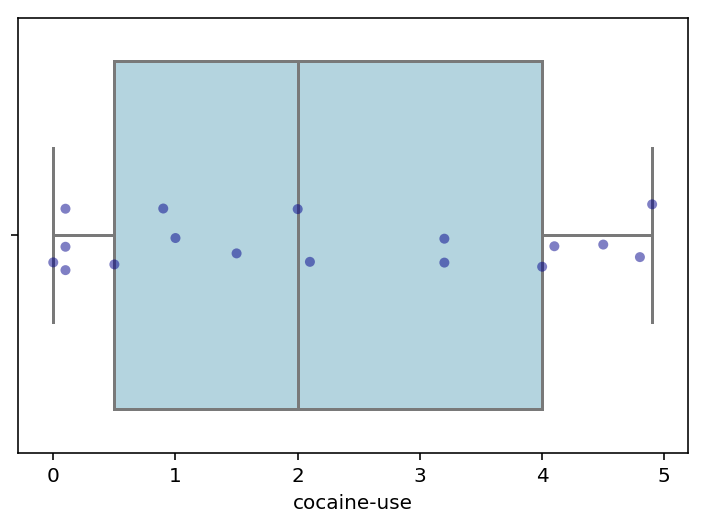

In [73]:
ax = sns.boxplot(x="cocaine-use", data=eda2, whis=np.inf, color='lightblue')
sns.stripplot(x= 'cocaine-use', data=eda2, alpha=0.5, color='darkblue')
plt.xlabel('cocaine-use')

plt.show()

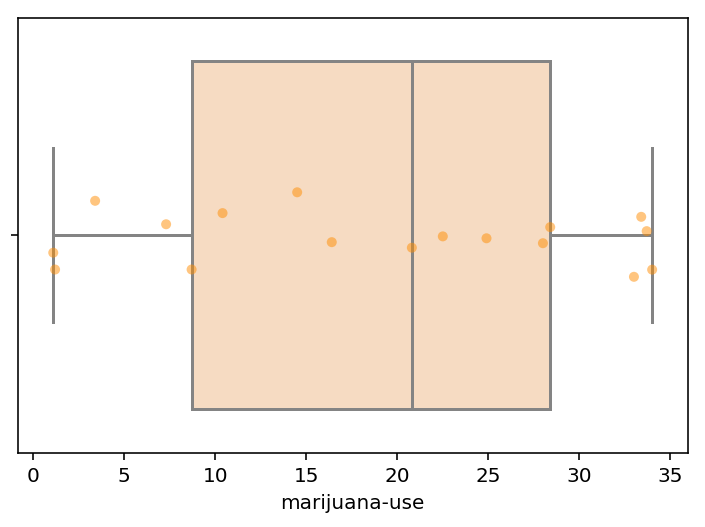

In [74]:
ax = sns.boxplot(x="marijuana-use", data=eda2, whis=np.inf, color='peachpuff')
sns.stripplot(x= 'marijuana-use', data=eda2, alpha=0.5, color='darkorange')
plt.xlabel('marijuana-use')
plt.show()

In [75]:
df_cocaine = eda2['cocaine-use']
df_marijuana = eda2['marijuana-use']



**Jointplots**

- Jointplots show the relationship between two continous random variables, as well as showing their independent variation (on the out-skirts of the graph)
- Using kind = reg, the linear regression is plotted. The relationship appears to be a strong positive correlation
- Using kind = kde estimates the probability density function of the continous random variables. Here we can see that there are areas in the distrbution that have more correlation than others. This may be linked to the age of the participants as the data is separated by age.

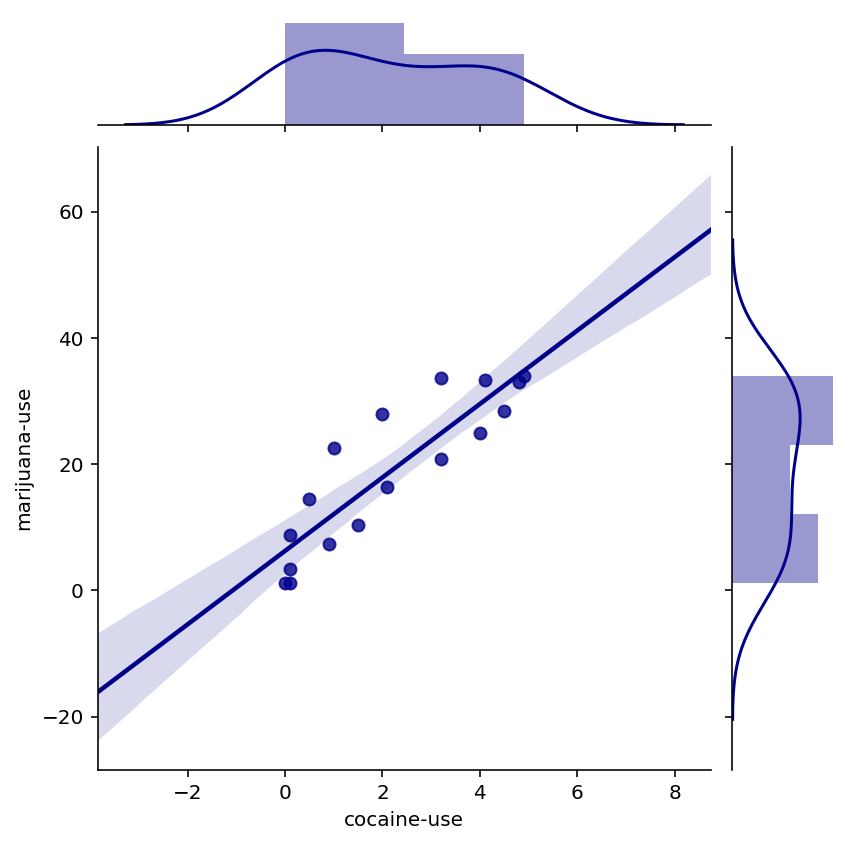

In [76]:
sns.jointplot(x='cocaine-use', y='marijuana-use', data=eda2, kind='reg', color='darkblue')

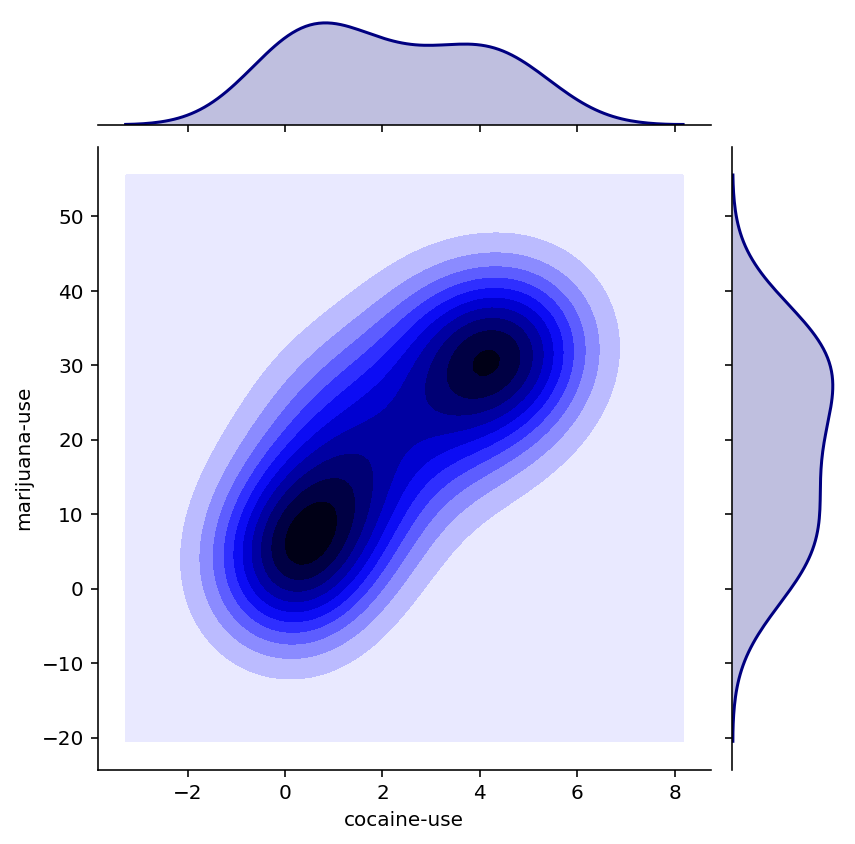

In [77]:
sns.jointplot(x='cocaine-use', y='marijuana-use', data=eda2, kind='kde', color='navy')


    
**Categorising by Age Groups**

- As the plot above shows that there are regions with an increased correlation we can have a brief look at how the relationship looks for oberservations separated by age group
- The graph below is a linear regression plot for each age group
- As expected from the joint plot above, there are some age groups who have this strong correlation between cocaine use and marijuana use, e.g. for people aged 32 years, and no relationship for other age groups e.g. aged 67
- In further investigation we could look into the other factors related age groups with the strongest correlation and see if this was true for other drug types

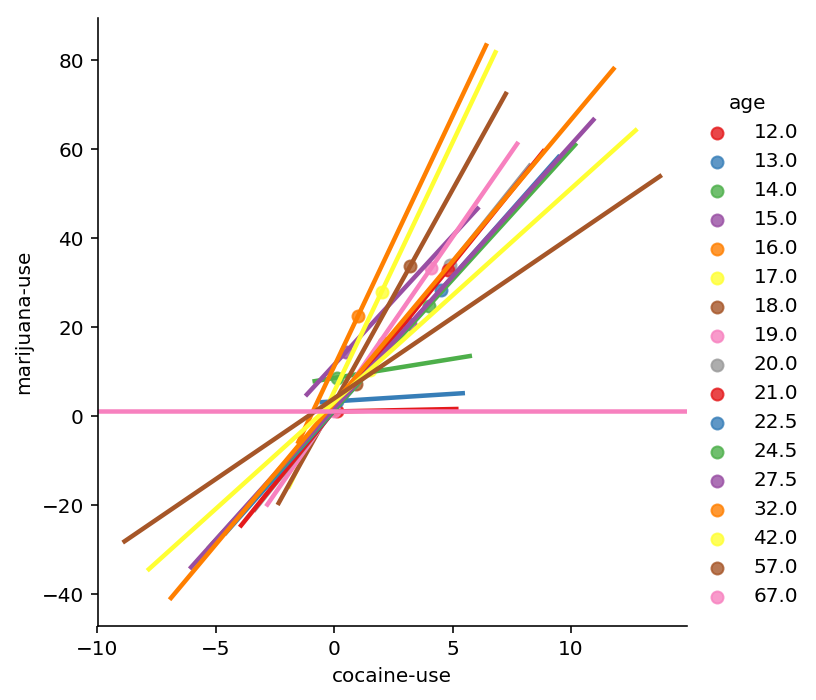

In [78]:
sns.lmplot(x='cocaine-use', y = 'marijuana-use', hue= 'age', palette='Set1', data=eda2)
plt.show()


    
**Spearman and Pearson Test for Correlation**
- Spearman correlation = 0.90, p value = 0.000000957
- Pearson correlation = 0.88, p value = 0.00000253
- These correlation coefficients inidicate strong postive correlation
- p value = The p values are significant as there are way below the usual bench mark of 0.05 or 0.01
- The p value indicates how likely it would be to see this pattern if no correlation was present
- The reason for Spearman correlation coefficient being slightly highly is because the relationship between the variables may not be completely linear, the Spearman coefficient analysis the points based on their ranking and not all on linear relationships.

In [79]:
stats.spearmanr(eda3)

SpearmanrResult(correlation=0.8985905984970894, pvalue=9.572092503252772e-07)

In [80]:
pearson = stats.pearsonr(df_cocaine, df_marijuana)
print(pearson)

(0.8837886126108127, 2.543911354758583e-06)




**Summary**
- Overall, we could conclude that there is a strong relationship between the use of cocaine and marijuana
- This provides the basis to look into further questions, such as age as a factor in this relationship
- We could also investigate more into the related lifestyle factors 
- And if the relationship is due to causation or just correlation

**Hypothesis Test**
- Based on the strong correlation (using Spearman) coefficient of 0.9 and p value 0.0000000957 
- We can reject the null hypothesis that there is no relationship between Cocaine-Use and Marijuana-Use



## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?



**1. Pull out the rate variable from the sat dataset**

In [81]:
rate = satcsv.Rate
rate.head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64



**2. Are there outliers in the dataset?**

- From the below boxplot and overlapping strip plot it is clear to see there are not outliers in the rate variable.

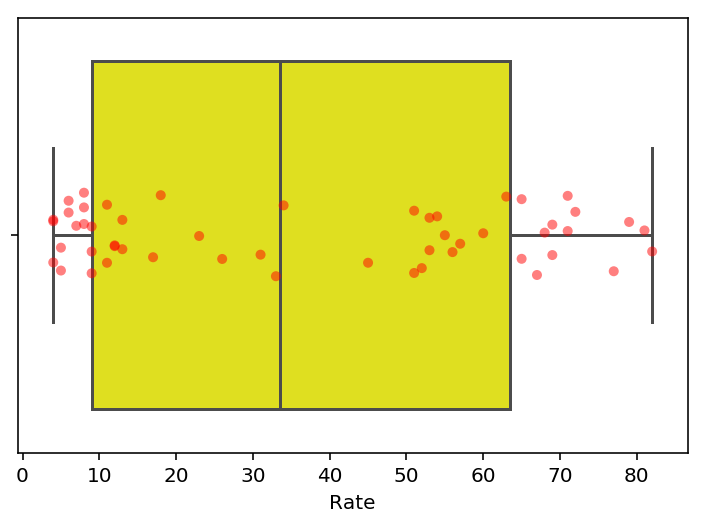

In [82]:
ax = sns.boxplot(x="Rate", data=satcsv, whis=np.inf, color='yellow')
sns.stripplot(x= 'Rate', data=satcsv, alpha=0.5, color='red')
plt.xlabel('Rate')
plt.show()



**2. Are there outliers in the dataset? Define, in words, how you numerically define outliers.**

- For Rate:

- Outliers are classed as outside 1.5 times the IQR range
- IQR = 63.5 - 9 = 54.5
- To calculate Outliers: IQR * 1.5 = 54.5 * 1.5 = 81.75
- Q1 = 9 - (IQR * 1.5) = 9 - 81.75 = -72.75
- Q3 = 63.5 + (IQR * 1.5) = 63.5 + 81.75 = 145.25

- As the minimum and maximum are within the range -72.75 to 145.25, this means that there are no outliers. (See minimun and maximum values below)

In [83]:
rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [84]:
q1, q3= np.percentile(rate,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [85]:
lower_bound

-72.75

In [86]:
upper_bound

145.25



**3. Print out the outliers in the dataset.**


**4. Remove the outliers from the dataset.**


**5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?**

- There are no outliers so the dataset does not need to be changed and the above commands are not possible

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [87]:
df.head()

,Math,Verbal
0,510,509
1,513,499
2,515,511
3,505,495
4,516,520



    
- The graphs below give us an idea about the relationship between the variables Math and Verbal
- They appear to have a positive correlation
- The second graph has a linear regression line fitted

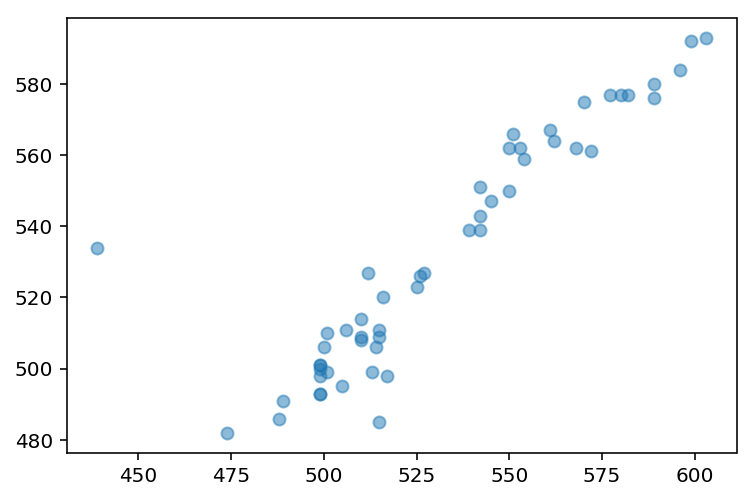

In [88]:
plt.scatter(df.Math, df.Verbal, marker='o', alpha=0.5)
plt.show()

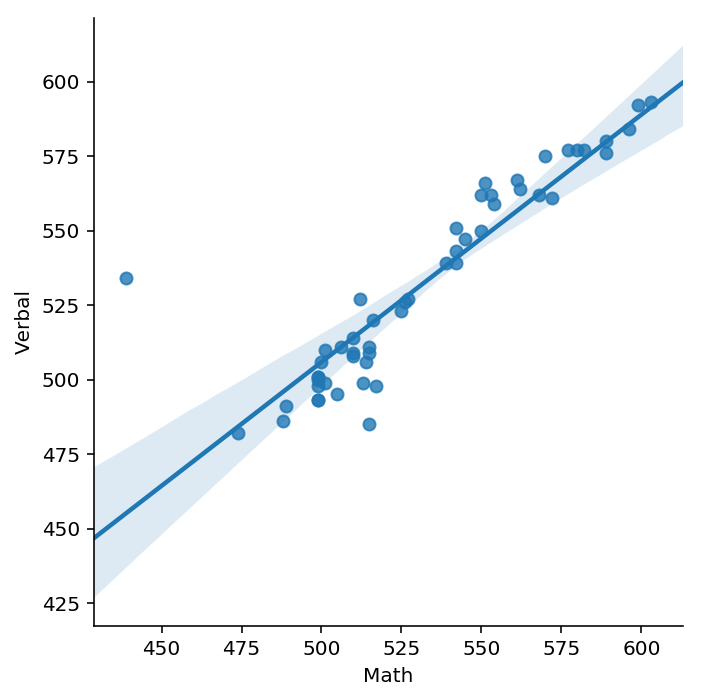

In [89]:
sns.lmplot(x='Math', y = 'Verbal', data=df)
plt.xlabel = 'Math'
plt.ylabel = 'Verbal'
plt.show()

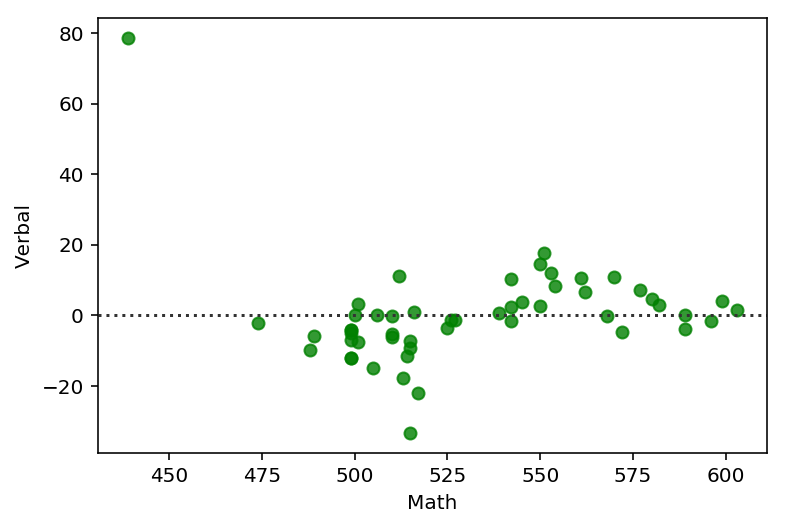

In [90]:
sns.residplot(x='Math', y='Verbal', data=df, color='green')
plt.xlabel = 'Math'
plt.ylabel = 'Verbal'
plt.show()



- The residual plot is used to get a better idea how well the regression captured the data
- The data points on this graph represent how close to the regression line they sat
- From this graph it is apparent that there is one extreme outlier and if this analysis was to go into further investigation it would be necessary to remove this outlier

In [91]:
stats.pearsonr(math,verbal)

(0.899870852544429, 1.192002673306768e-19)

In [92]:
stats.spearmanr(df)

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)


    
- Pearson Correlation: 0.90, p value = 1.192002673306768e-19    
- Spearman Correlation: 0.91, p value = 3.235231959777518e-20

- Both have a very strong postive correlation coefficient
- Both have extremely small p value, lower than the benchmark of 0.05 or 0.01



- In the scatter plot above it is evident that there is a strong relationship between the two variable but the relationship is not completely linear. This is the reason for the Spearman Correlation having a slightly more positive correlation between the two variables.

**How does the spearman correlation compare to the pearson correlation?**

- The Pearson correlation evaluates the linear relationship between two continuous variables
- A relationship is linear when a change in one variable is associated with a proportional change in the other variable
- The Spearman correlation evaluates the varying relationship between two continuous or ordinal variables
-  In a varying or monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
- The Spearman Correlation is is non parametric version of the pearson correlation

**Describe clearly in words the process of calculating the spearman rank correlation**

1. First the observations are ranked from highest to lowest for both variables 
2. The difference between ranks for each observation is calculated
3. The difference is squared (d squared)
4. All of the d squared values are added up
5. The added d sqaured values are multipled by six and diveded by n(n-1) - where n is the number of observations
6. The result of this is minused from 1

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [93]:
satcsv.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4




- As the 'Verbal - Math' column is no longer necessary, it is removed from the dataframe

In [94]:
satcsv.drop(['Verbal - Math'], axis=1)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [95]:
satcsv.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [96]:
satcsv['Percentile'] = satcsv.Rate.rank(pct=True)
satcsv.head()

,State,Rate,Verbal,Math,Verbal - Math,Percentile
0,CT,82,509,510,-1,1.000000
1,NJ,81,499,513,-14,0.980769
2,MA,79,511,515,-4,0.961538
3,NY,77,495,505,-10,0.942308
4,NH,72,520,516,4,0.923077


In [97]:
satcsv.tail()

,State,Rate,Verbal,Math,Verbal - Math,Percentile
47,IA,5,593,603,-10,0.086538
48,SD,4,577,582,-5,0.038462
49,ND,4,592,599,-7,0.038462
50,MS,4,566,551,15,0.038462
51,All,45,506,514,-8,0.538462


In [98]:
satcsv.loc[satcsv['State'] == 'CA']


,State,Rate,Verbal,Math,Verbal - Math,Percentile
23,CA,51,498,517,-19,0.567308




**Show the percentile of California in Rate**
- California is in the percentile 56.7 for Rate.

**How is percentile related to the spearman rank correlation?**
- Percentiles position the values according to where they ranked by percent. Eg. The 20th percentile is the value below which 20% of the observations may be found
- Percentiles are related to the Spearman Rank Correlation they both work with how the data is ordered or 'ranked'.
- Ranking is the same approach to data as the Spearman Rank Correlation uses

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.



**Why might percentile scoring be useful for dealing with outliers?**
- As percentile scoring sorts the data into order based on their values relative to the rest of the data, it is easy to see the outliers.
- Percentiles are a convenient measurement as most people are familiar with percentage. 



**Plot the distribution of a variable of your choice from the drug use dataset**

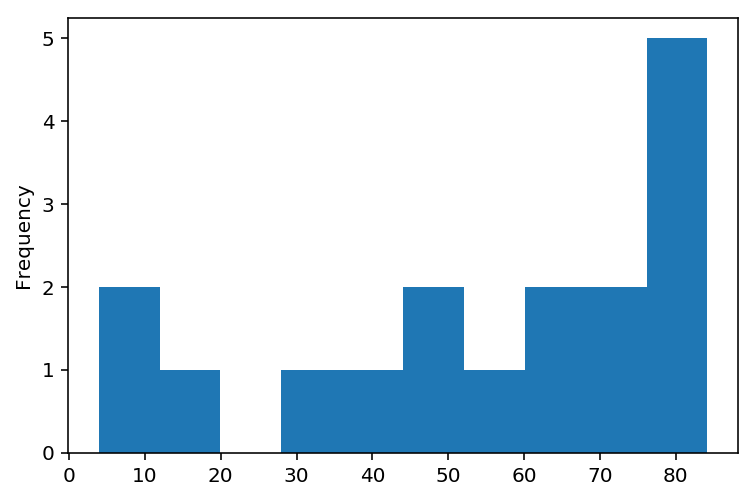

In [99]:
eda['alcohol-use'].plot(kind='hist', bins=10)
plt.show()

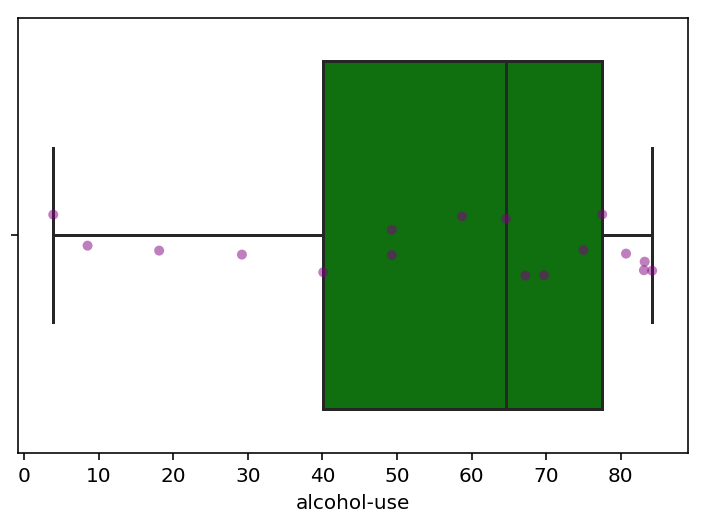

In [101]:
ax = sns.boxplot(x="alcohol-use", data=eda2, whis=np.inf, color = 'green')
sns.stripplot(x= 'alcohol-use', data=eda2, alpha=0.5, color='purple')
plt.xlabel=('alcohol-use')
plt.show()

In [102]:
alcohol = eda.loc[:, ['age','alcohol-use']]
alcohol.head()

,age,alcohol-use
0,12.0,3.9
1,13.0,8.5
2,14.0,18.1
3,15.0,29.2
4,16.0,40.1


In [103]:
alcohol['Percentile'] = alcohol['alcohol-use'].rank(pct=True)

In [104]:
alcohol.head()

,age,alcohol-use,Percentile
0,12.0,3.9,0.058824
1,13.0,8.5,0.117647
2,14.0,18.1,0.176471
3,15.0,29.2,0.235294
4,16.0,40.1,0.294118


In [105]:
alcohol.sort_values('Percentile', ascending=False).set_index('age')

,alcohol-use,Percentile
age,,
22.5,84.2,1.000000
21.0,83.2,0.941176
24.5,83.1,0.882353
27.5,80.7,0.823529
32.0,77.5,0.764706
42.0,75.0,0.705882
20.0,69.7,0.647059
57.0,67.2,0.588235
19.0,64.6,0.529412




**Plot the same variable but percentile scored**

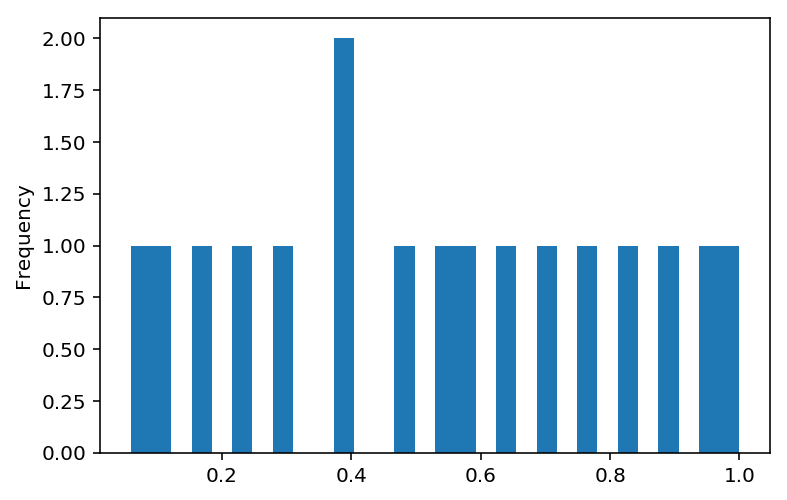

In [106]:
alcohol['Percentile'].plot(kind='hist', bins=30)
plt.show()

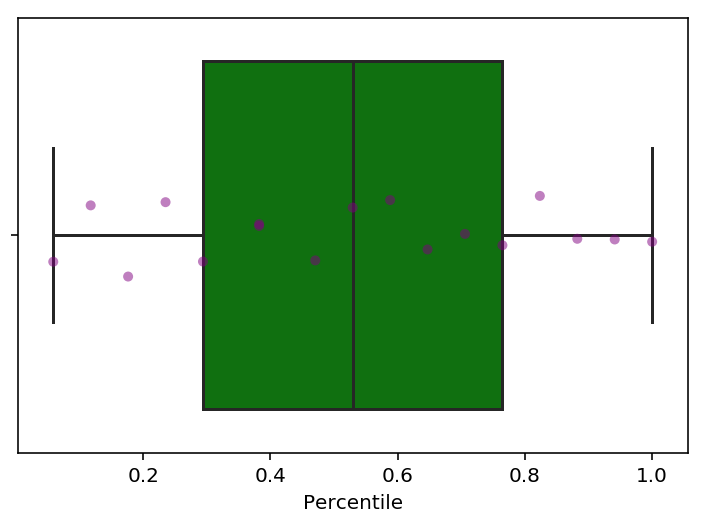

In [108]:
ax = sns.boxplot(x='Percentile', data=alcohol, whis=np.inf, color = 'green')
sns.stripplot(x= 'Percentile', data=alcohol, alpha=0.5, color='purple')
plt.xlabel=('Percentile')
plt.show()


 
**Describe the effect, visually, of coverting raw scores to percentile**
 
- Converting to percentile normalises the data and it start to appear as a normal distribution
- This makes it easier to visually intepret